In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score, mean_squared_error

In [2]:
data = pd.read_csv("Advertising.csv")

In [3]:
data.head()

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.describe()

,ID,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
# Removing ID column as it is useless

data.drop(columns=["ID"], inplace=True)

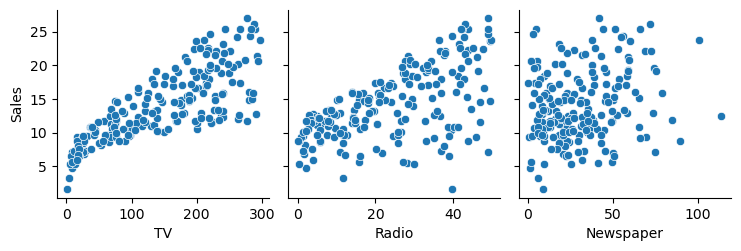

In [7]:
# Visualizing features relationship with target variable

sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars=['Sales'])

In [8]:
# Scaling the data to minimize error

norm_data = normalize(data, axis=0)
scaled_data = pd.DataFrame(norm_data, columns=data.columns)

In [9]:
scaled_data

,TV,Radio,Newspaper,Sales
0,0.095617,0.096921,0.130520,0.104479
1,0.018492,0.100767,0.085065,0.049167
2,0.007147,0.117689,0.130709,0.043966
3,0.062955,0.105895,0.110339,0.087460
4,0.075131,0.027692,0.110150,0.060985
...,...,...,...,...
195,0.015874,0.009487,0.026029,0.035929
196,0.039144,0.012564,0.015278,0.045857
197,0.073552,0.023846,0.012071,0.060513
198,0.117849,0.107690,0.124862,0.120553


In [10]:
# Splitting features and target variables

X = scaled_data[['TV', 'Radio', 'Newspaper']]
y = scaled_data[['Sales']]

In [11]:
# Preparing training and validation sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)
X_train

,TV,Radio,Newspaper
116,0.057844,0.036666,0.048285
67,0.057886,0.037179,0.019239
78,0.002244,0.076665,0.017730
42,0.122004,0.071024,0.003395
17,0.116935,0.101536,0.105246
...,...,...,...
133,0.091337,0.085895,0.085065
137,0.113735,0.074101,0.112602
72,0.011137,0.084613,0.036402
140,0.030501,0.043589,0.024331


In [12]:
# Building Decision Tree Regressor

dtree = DecisionTreeRegressor(random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [13]:
# Predicting with Decision Tree

dtree_pred = dtree.predict(X_test)
dtree_err = mean_squared_error(y_true=y_test, y_pred=dtree_pred, squared=True)

print(f"Decision Tree root mean squared error: {dtree_err:.7f}")

Decision Tree root mean squared error: 0.0000283


In [14]:
# Building ensemble model

forest = RandomForestRegressor(random_state=1)
forest.fit(X_train, y_train)

/tmp/ipykernel_6547/1218700020.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


RandomForestRegressor(random_state=1)

In [15]:
# Predicting with Random Forest

forest_pred = forest.predict(X_test)
forest_err = mean_squared_error(y_true=y_test, y_pred=forest_pred, squared=True)

print(f"Random Forest root mean squared error: {forest_err:.7f}")

Random Forest root mean squared error: 0.0000093
